# Electric Motor Tempreture Prediction

## Data Loading

In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Electric Motor Tempreture Prediction/measures_v2.csv.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Electric Motor Tempreture Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('measures_v2.csv')

In [3]:
df = df.head(20000)

In [4]:
df.shape

(20000, 13)

In [5]:
df.size

260000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   u_q             20000 non-null  float64
 1   coolant         20000 non-null  float64
 2   stator_winding  20000 non-null  float64
 3   u_d             20000 non-null  float64
 4   stator_tooth    20000 non-null  float64
 5   motor_speed     20000 non-null  float64
 6   i_d             20000 non-null  float64
 7   i_q             20000 non-null  float64
 8   pm              20000 non-null  float64
 9   stator_yoke     20000 non-null  float64
 10  ambient         20000 non-null  float64
 11  torque          20000 non-null  float64
 12  profile_id      20000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 2.0 MB


In [7]:
df.describe().T

count         mean          std         min          25%  \
u_q             20000.0    94.636307    32.330596   -0.974433    86.865158   
coolant         20000.0    18.954062     0.454144   17.516184    18.583653   
stator_winding  20000.0    56.601847    13.256241   19.049341    49.555732   
u_d             20000.0   -51.839892    40.197872  -97.081703   -96.185537   
stator_tooth    20000.0    46.738196     9.958606   18.268650    43.037443   
motor_speed     20000.0  4184.692969  1612.965593   -0.004142  4999.943359   
i_d             20000.0  -103.851099    35.954753 -143.617004  -138.396442   
i_q             20000.0    49.705426    47.719983   -0.000785     0.941242   
pm              20000.0    53.970484    12.829950   24.264736    50.306077   
stator_yoke     20000.0    35.346068     5.788827   18.076689    33.272980   
ambient         20000.0    23.584962     1.299221   19.850620    22.664916   
torque          20000.0    41.244558    37.997452   -0.932627    -0.436256   
profile_id      20000.0    14.578400     4.816245    5.000000    17.000000   

                        50%          75%          max  
u_q               87.610176   130.580078   131.331100  
coolant           19.012542    19.321507    19.986029  
stator_winding    50.570692    72.111658    72.430313  
u_d              -43.027119    -6.425424     0.851181  
stator_tooth      44.236067    57.554139    58.746349  
motor_speed     4999.947266  4999.951172  4999.971191  
i_d              -97.767117   -96.278299     0.004419  
i_q               53.333364    53.458726   132.619171  
pm                53.532501    66.630318    69.588531  
stator_yoke       33.739271    41.458940    42.770332  
ambient           23.859433    24.744128    25.875355  
torque            48.491821    48.672875   103.667618  
profile_id        17.000000    17.000000    17.000000

In [8]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

u_q               19242
coolant           19750
stator_winding    16816
u_d               19746
stator_tooth      19540
motor_speed         640
i_d               16895
i_q               15748
pm                19887
stator_yoke       19231
ambient           19736
torque            19437
profile_id            2
dtype: int64

## Data Visualization

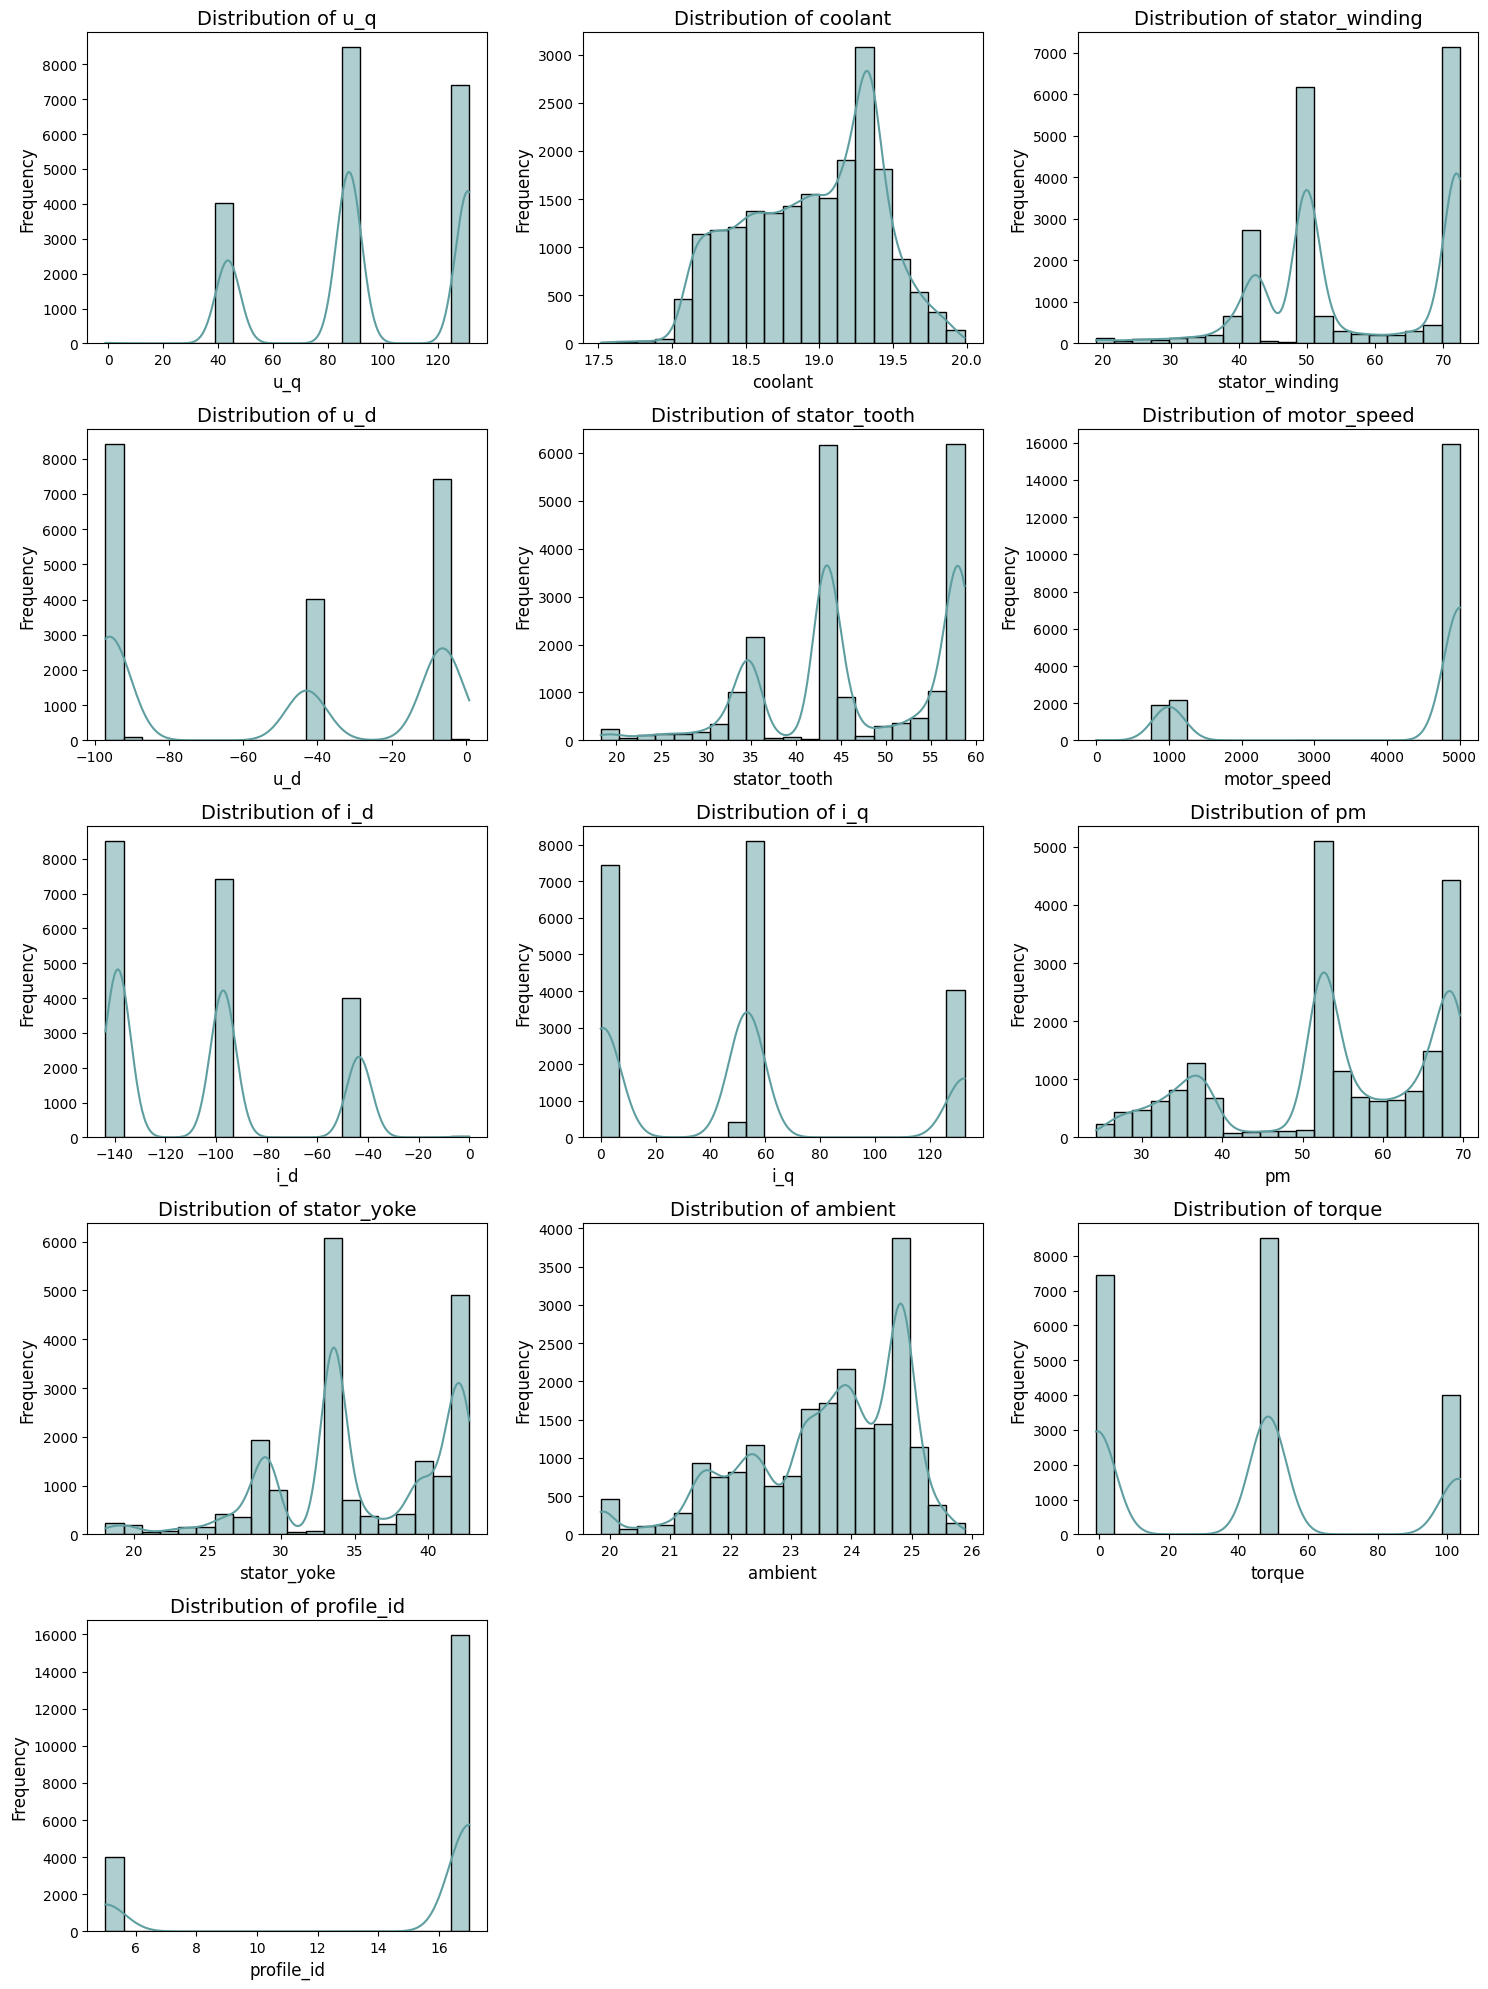

In [11]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

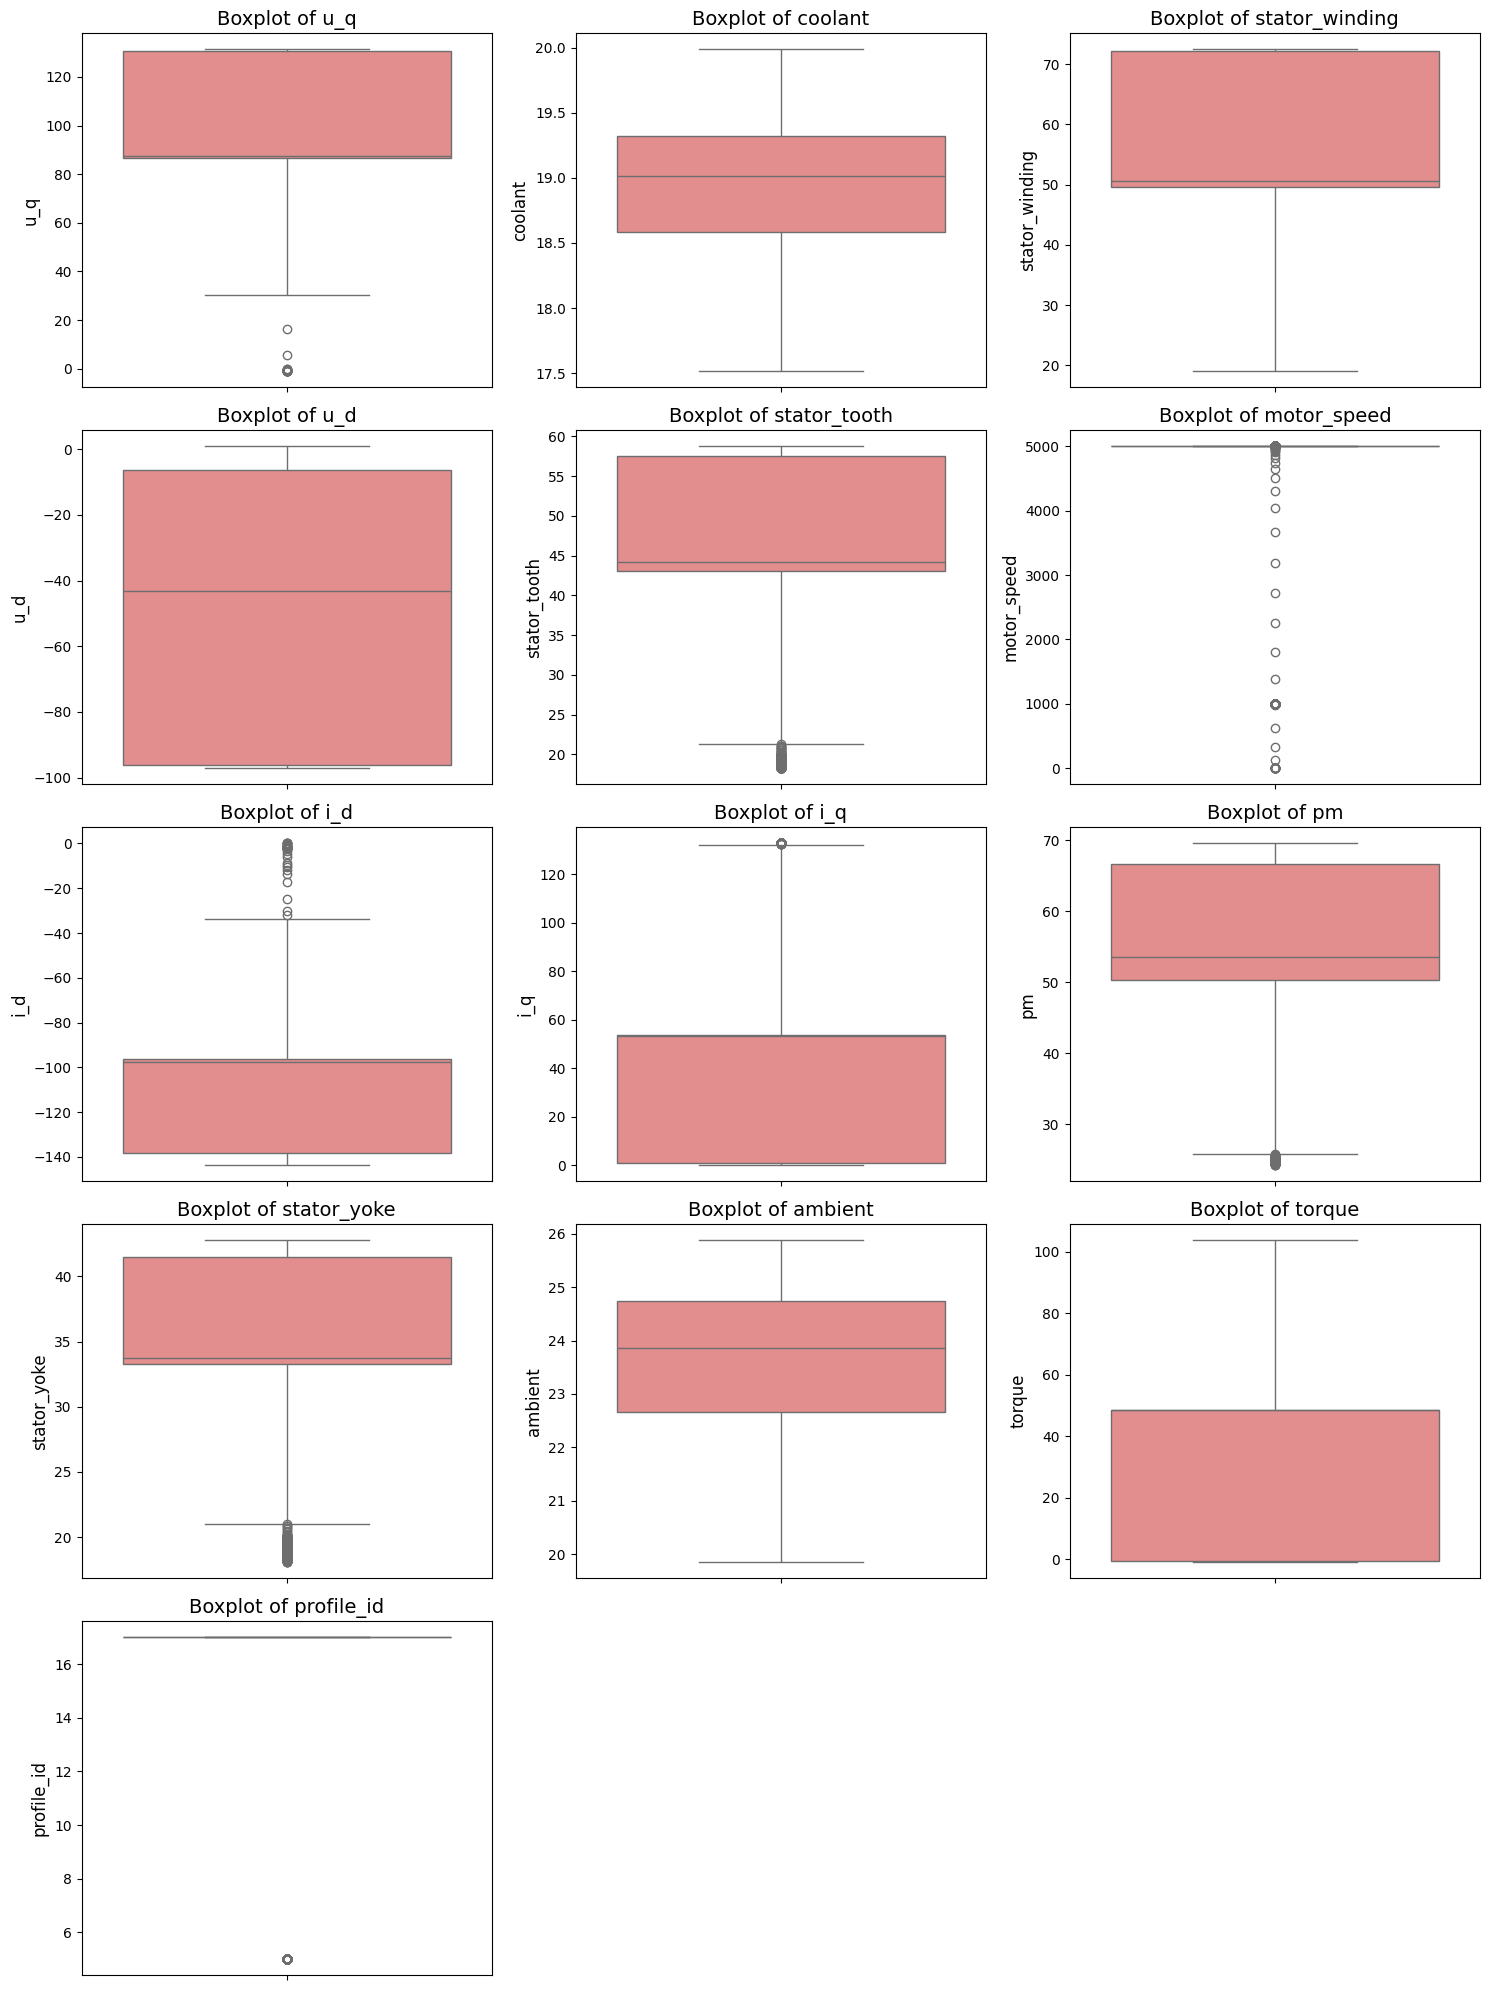

In [ ]:
# Plotting each numerical column as a Boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

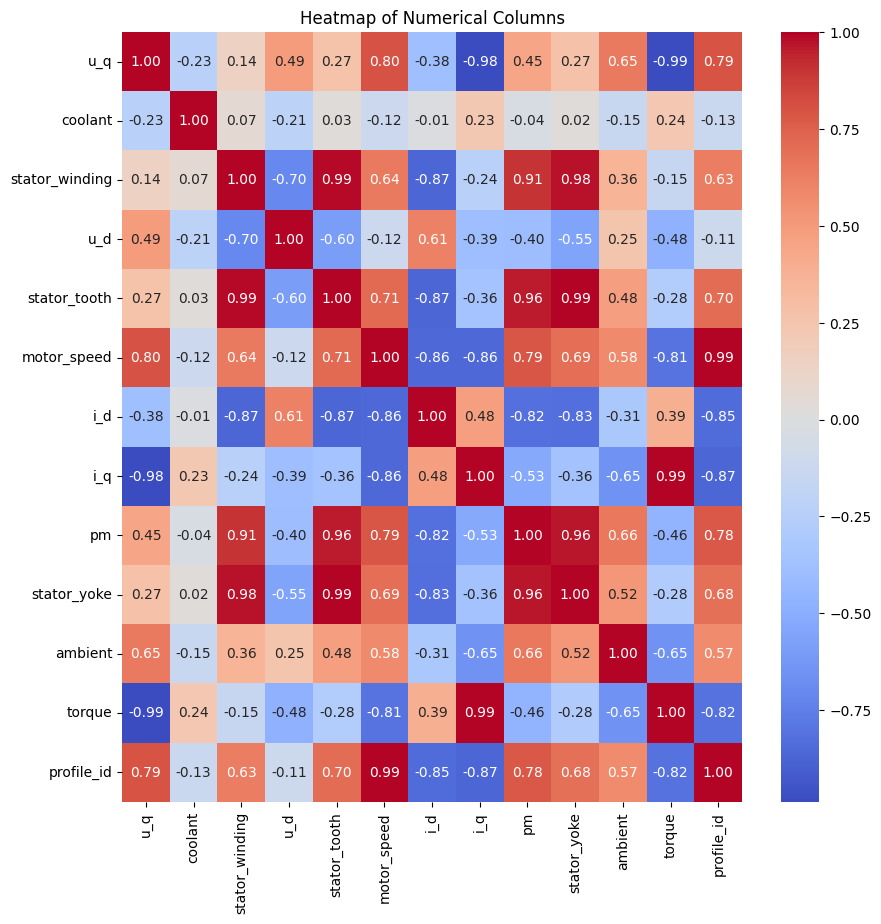

In [13]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [14]:
X = df.drop(columns=['pm'], axis=1)
y = df['pm']

In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [16]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [17]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [18]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.9899242062548503,
 0.9998273402073745,
 0.9999206677752857,
 0.9934517794528922,
 0.9989889993038888,
 0.9999061493095063,
 0.9998240141542285,
 0.724560960284133,
 0.9998435972669842]

## Model Evaluation

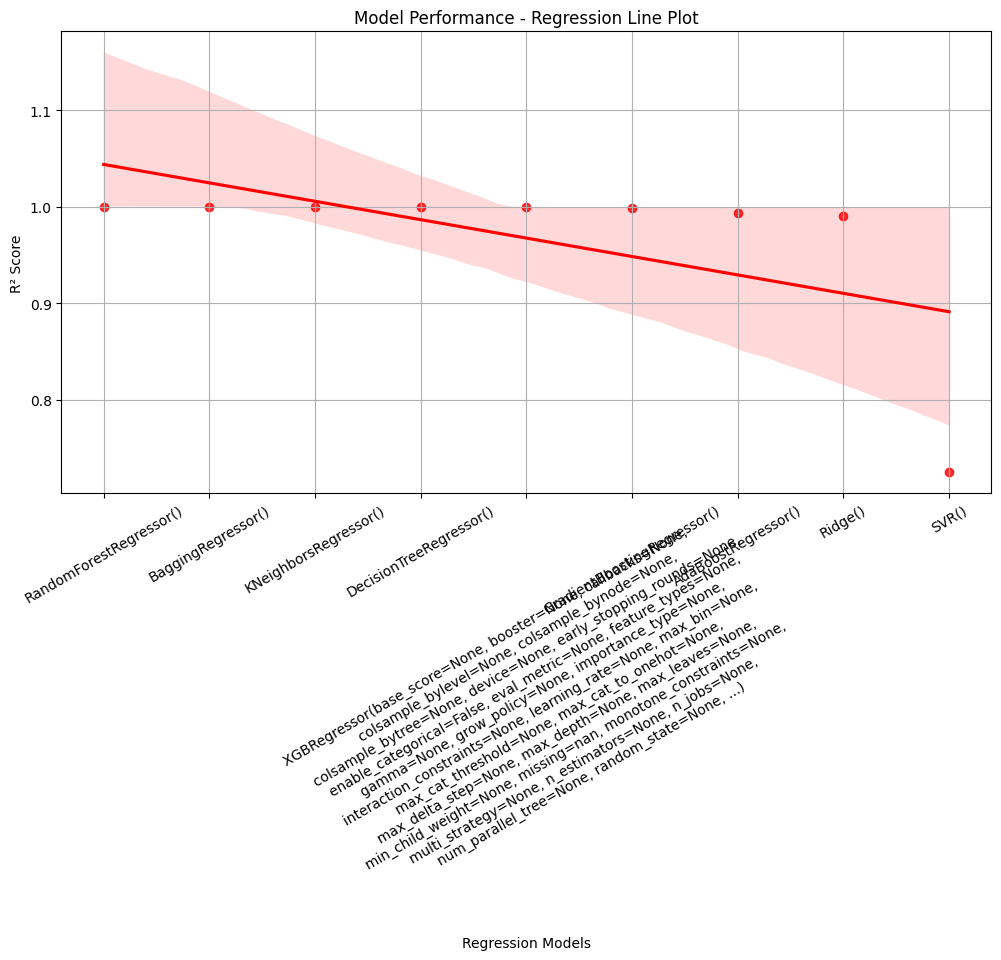

In [19]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

df_scores = pd.DataFrame({'Model': model_li, 'R2 Score': Score})
df_scores = df_scores.sort_values(by='R2 Score', ascending=False)

# Regression line

plt.figure(figsize=(12, 6))
sns.regplot(x=list(range(len(df_scores))), y=df_scores['R2 Score'],
            scatter=True, marker="o", fit_reg=True, color="red")

plt.xticks(range(len(df_scores)), df_scores['Model'], rotation=30)
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Model Performance - Regression Line Plot")
plt.grid(True)
plt.show()